# CIFAR-10
- Loading Libraries
- Data Preprocessing
- Data Visualization
- Classification Algorithm CNN
- Results 
- Overall Output

## Loading Libraries

In [1]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D , MaxPool2D , Flatten, Dense , Dropout , BatchNormalization
from keras.callbacks import ModelCheckpoint
from matplotlib import gridspec
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Using TensorFlow backend.


## Data Preprocessing

In [2]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data() # Loading the dataset into training and testing

170500096/170498071 [==============================] - 13s 0us/step


In [3]:
print("Training dataset has {} training samples".format(len(y_train)))
print("Testing dataset has {} testing samples".format(len(y_test)))
print("The shape of dataset is {} for images and {} for labels".format(x_train.shape[1:], y_train.shape[1:]))

Training dataset has 50000 training samples
Testing dataset has 10000 testing samples
The shape of dataset is (32, 32, 3) for images and (1,) for labels


There are 10 classes in CIFAR-10 the list is made accordingly

In [4]:
classes = ["Airplane", "Automobile" , "Bird" , "Cat" , "Deer" , "Dog" , "Frog" , "Horse" , "Ship" , "Truck"]

Filtering the data according to the labels

In [5]:
airplane = []
automobile = []
bird = []
cat = []
deer = []
dog = []
frog = []
horse = []
ship = []
truck = []
cifar = [airplane , automobile , bird , cat , deer , dog , frog , horse , ship , truck]

In [6]:
# Making data into executable formate
y_train= y_train.ravel()
y_test = y_test.ravel()

In [7]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [8]:
for i in range(len(y_train)):
    value = y_train[i]
    cifar[value].append(x_train[i])
for i in range(len(y_test)):
    value = y_train[i]
    cifar[value].append(x_train[i])

In [9]:
for i in range(len(cifar)):
    print("Number of samples of {}  =  {} ".format(classes[i], len(cifar[i])))

Number of samples of Airplane  =  6005 
Number of samples of Automobile  =  5974 
Number of samples of Bird  =  6032 
Number of samples of Cat  =  6016 
Number of samples of Deer  =  5999 
Number of samples of Dog  =  5937 
Number of samples of Frog  =  6030 
Number of samples of Horse  =  6001 
Number of samples of Ship  =  6025 
Number of samples of Truck  =  5981 


Making labels of the training executable for the model.

In [10]:
y_train_bin = np_utils.to_categorical(y_train, len(classes))
y_test_bin = np_utils.to_categorical(y_test, len(classes))

In [11]:
print("The machine can easily classify with binary data for example {}".format(y_train_bin[0]))

The machine can easily classify with binary data for example [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


Extracting some data for validation testing 

In this model we are taking 10000 samples for validation testing

In [12]:
x_train,x_valid = x_train[10000:], x_train[:10000]
y_train_bin,y_valid = y_train_bin[10000:], y_train_bin[:10000]
y_train = y_train[10000:]

Shapes of the modified dataset is

In [13]:
print("Number of training samples are :")
print("Images = " , x_train.shape)
print("Labels = " , y_train_bin.shape)
print("Number of testing examples are : ")
print("Images = " , x_test.shape)
print("Lables = ", y_test.shape)
print("Number of Validation examples are : ")
print("Images = " , x_valid.shape)
print("Labels = ", y_valid.shape)

Number of training samples are :
Images =  (40000, 32, 32, 3)
Labels =  (40000, 10)
Number of testing examples are : 
Images =  (10000, 32, 32, 3)
Lables =  (10000,)
Number of Validation examples are : 
Images =  (10000, 32, 32, 3)
Labels =  (10000, 10)


## Data Visualization

We are defining a function. With the help of this function you can visualize the images of each class.The number of rows and column is decided by the user

In [14]:
def Visualization():
    row = int(input("Enter the value of row = "))
    column = int(input("Enter the value of Column = "))
    print(classes)
    number = int(input("Enter the class number starting from 0 = "))
    value = np.random.randint(0,5000)
    if(value < row*column):
        print("Please try with some lower values")
    else:    
        fig = plt.figure(figsize=(10 , 10))
        plt.gca().set_title(classes[number])
        plt.axis("off")
        for i in range(row * column):
            ax = fig.add_subplot(row,column, i+1, xticks=[], yticks=[])
            ax.imshow(cifar[number][i+value])

Enter the value of row = 4
Enter the value of Column = 4
['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
Enter the class number starting from 0 = 0


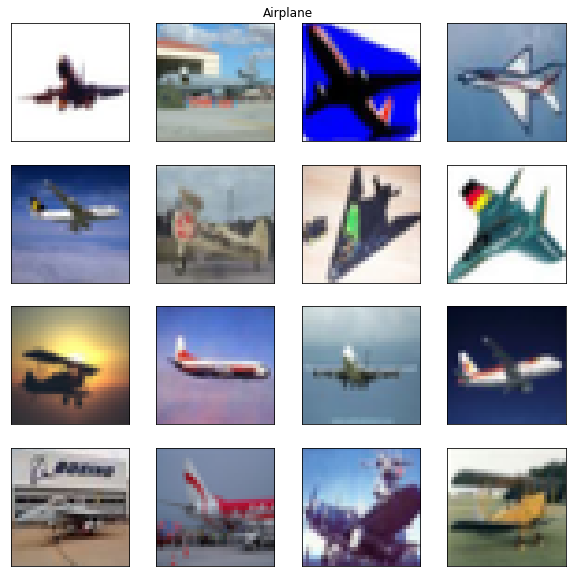

In [15]:
Visualization()

You can visualize the data. Just uncomment the below code block and execute the function. This function will give random images of a particular class.

In [16]:
#Visualization()    # uncomment this function and execute the function for visualization

## Preparing CNN Model for Classification

In [21]:
def Baseline_Model():
  model = Sequential()
  model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.25))
  model.add(Dense(10, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  batch_size = 32
  data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
  train_generator = data_generator.flow(x_train, y_train_bin, batch_size)
  steps_per_epoch = x_train.shape[0] // batch_size

  return model, train_generator , steps_per_epoch
model , train_generator , steps_per_epoch = Baseline_Model()

In [24]:
def Training(model , train_generator , steps_per_epoch):
  history =  model.fit(train_generator, epochs=50,steps_per_epoch=steps_per_epoch,validation_data=(x_test, y_test_bin))
  return history , model
history , model = Training(model , train_generator , steps_per_epoch)     # you can execute this function for Training the model

Epoch 1/50
1250/1250 [==============================] - 27s 21ms/step - loss: 1.3534 - accuracy: 0.5117 - val_loss: 1.1570 - val_accuracy: 0.5868
Epoch 2/50
1250/1250 [==============================] - 27s 21ms/step - loss: 1.1287 - accuracy: 0.6040 - val_loss: 1.0203 - val_accuracy: 0.6475
Epoch 3/50
1250/1250 [==============================] - 26s 21ms/step - loss: 1.0008 - accuracy: 0.6487 - val_loss: 1.0239 - val_accuracy: 0.6604
Epoch 4/50
1250/1250 [==============================] - 26s 21ms/step - loss: 0.9109 - accuracy: 0.6839 - val_loss: 0.7763 - val_accuracy: 0.7312
Epoch 5/50
1250/1250 [==============================] - 26s 21ms/step - loss: 0.8515 - accuracy: 0.7064 - val_loss: 0.8662 - val_accuracy: 0.7100
Epoch 6/50
1250/1250 [==============================] - 27s 21ms/step - loss: 0.8042 - accuracy: 0.7250 - val_loss: 0.8580 - val_accuracy: 0.7241
Epoch 7/50
1250/1250 [==============================] - 26s 21ms/step - loss: 0.7484 - accuracy: 0.7441 - val_loss: 0.6660 -

## Testing of Classification Algorithm CNN

In [25]:
def Testing():
    def get_preds(x,model):
        x = np.reshape(x,(1,32,32,3))
        pr = model.predict(x)    
        pr = np.array(pr)[0]
        idx = np.argmax(pr)
        conf = round(pr[idx]*100,2)
        lab = classes[idx]
        return lab,conf,idx
    
    plt.figure(figsize = (20,20))
    gs1 = gridspec.GridSpec(3, 3)
    gs1.update(wspace=0.025, hspace=0.5)
    padding = 5
    value = np.random.randint(0, 950)
    for i in range(0, 9):
        plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)
        ax1 = plt.subplot(gs1[i])
        ax1.axis("off")
        pr,conf,idx = get_preds(x_test[i+value],model)
    
        ax1.annotate(
        s = '{0}:{1}% ({2})'.format(pr,conf , classes[y_test[i+value]]),
        color=("green" if idx == y_test[i+value] else "red"),
        fontsize = 15,
        xy=(0, 0), 
        xytext=(padding-1, -(padding-1)), 
        textcoords = 'offset pixels',
        bbox=dict(facecolor='white', alpha=1, pad=padding),
        va='top',
        ha='left',
        )
        ax1.imshow(x_test[i+value])

To test the function , execute the below function

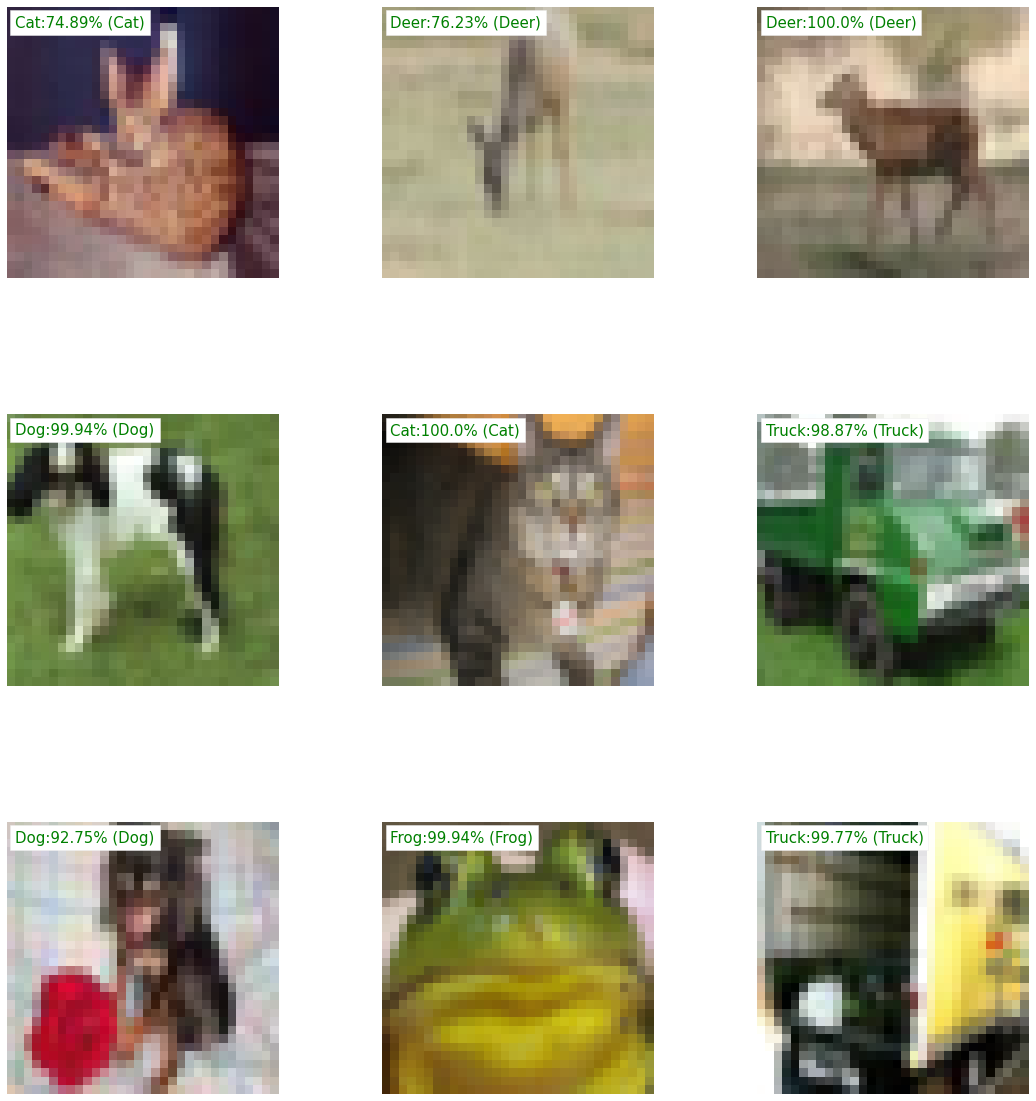

In [44]:
Testing()     # You can test the model by executing this function. It will always give you some random image

## Results and Evaluation

In [60]:
def Model_Accuracy():
    print(history.history.keys())
    plt.plot(history.history['accuracy'], marker = "o" , color = "red")
    plt.plot(history.history['val_accuracy'], marker = "<" , color = "blue")
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.ylim(0,1)
    plt.grid(color = "black")
    plt.legend(['Train accuracy', 'Validation accuracy'], loc='upper left')
    plt.show()
def Model_loss():
    plt.plot(history.history['loss'], marker = "o" , color = "red")
    plt.plot(history.history['val_loss'] , marker = "<" ,color = "blue")
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.grid(color = "black")
    plt.legend(['Train loss', 'Validation loss'])
    plt.show()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


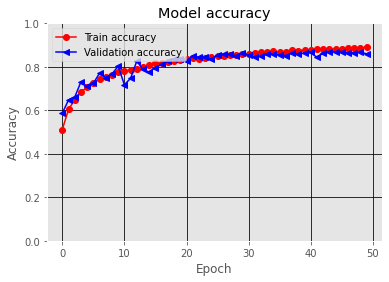

In [61]:
Model_Accuracy()   # Run this function to get the accuracy results

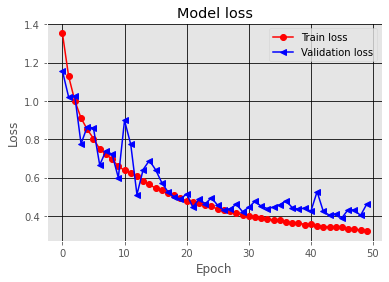

In [62]:
Model_loss()      # Run this function to get the loss results

In [63]:
def confusion_matrix_diagram():
  y_pred = model.predict_classes(x_test)
  cm = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classes)
  fig, ax = plt.subplots(figsize=(10, 10))
  plt.grid(color = "black")
  disp = disp.plot(xticks_rotation='vertical', ax=ax, cmap = "summer")

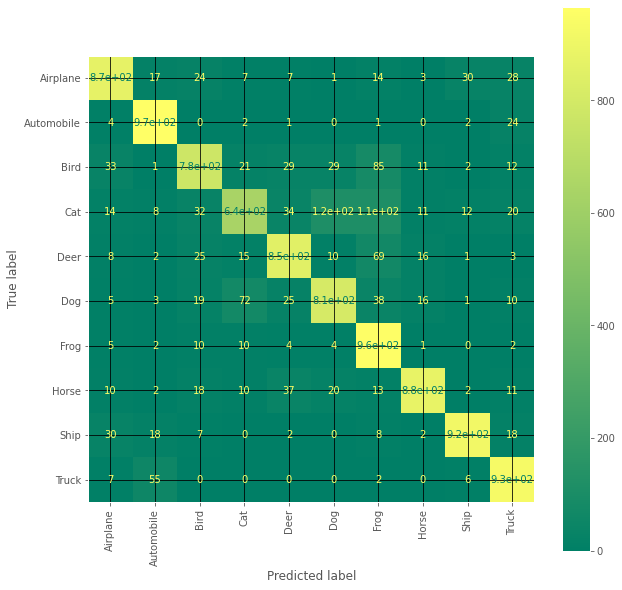

In [64]:
confusion_matrix_diagram()     # Run this function to get the Confusion Matrix 

In [32]:
def SOTA_Accuracy():
    x = [1,2,3,4,5,6,7,8,9,10,11]
    y = [88.0, 90.5 , 90.65 , 91.20 , 91.80 , 93.70 , 96.50 , 96.54 , 96.69 , 97.88 , 99.00]
    label_name = ["MCDNN","GPEI", "Maxout Network (K = 2)", "Network in Network", "DSN", "SSCNN", "Fractional MP", "DenseNet", "Deep pyramidal residual network" , "SENet + ShakeShake + Cutout" ,"SENet + ShakeShake + Cutout"]
    
    for i in range(len(label_name)):
        print(i+1," ",label_name[i])
    plt.style.use("ggplot")
    plt.plot(x,y , marker = "o" , label = "SOTA accuracy")
    plt.grid(color="black")
    plt.plot(12 , model.evaluate(x_test, y_test_bin)[1]*100, color = "blue",marker = "o" , label = "My Model Accuracy")
    plt.ylim(0,110)
    plt.xlim(0,13)
    plt.title("SOTA accuracy")
    plt.xlabel("Name of Model")
    plt.ylabel("Percentage Correct")
    plt.legend()

1   MCDNN
2   GPEI
3   Maxout Network (K = 2)
4   Network in Network
5   DSN
6   SSCNN
7   Fractional MP
8   DenseNet
9   Deep pyramidal residual network
10   SENet + ShakeShake + Cutout
11   SENet + ShakeShake + Cutout
10000/10000 [==============================] - 1s 136us/step


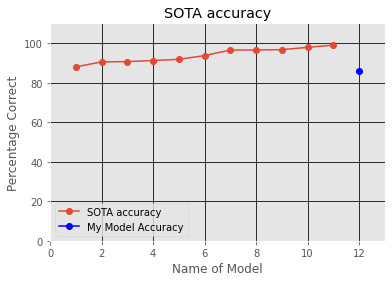

In [65]:
SOTA_Accuracy()     # you can run the following function to get the model accuracy with SOTA accuracy


In [34]:
accuracy= model.evaluate(x_test, y_test_bin)

10000/10000 [==============================] - 1s 136us/step


## Final Output Function

In [35]:
def main():
    print("You can check all the possible dunction here as well")
    print("Press 1 for data visualization")
    print("Press 2 for Testing the model")
    print("Press 3 for Results i.e validation loss , validation accuracy , confusion matrix and SOTA accuracy")
    print("Press 4 to check the accuracy")
    number = int(input("Enter the number here = "))
    if(number == 1):
        Visualization()
    elif(number == 2):
        Testing()
    elif(number == 3):
        print("Press 1 for Model Accuracy")
        print("Press 2 for Model Loss")
        print("Press 3 for Confusion Matrix")
        print("Press 4 for SOTA Accuracy")
        number = int(input("Enter the number here = "))
        if(number == 1):
          Model_Accuracy()
        elif(number == 2):
          Model_loss()
        elif(number == 3):
          confusion_matrix_diagram()
        elif(number == 4):
          SOTA_Accuracy()
        else:
          print("Invalid Input")
    elif(number == 4):
        print("Accuracy is = {}%".format(round(accuracy[1]*100,2)))
    else:
        print("Incorrect input")


Just uncomment the below code block and execute the main function for overall project

In [36]:
#main() # uncomment this line

You can check all the possible dunction here as well
Press 1 for data visualization
Press 2 for Testing the model
Press 3 for Results i.e validation loss , validation accuracy , confusion matrix and SOTA accuracy
Press 4 to check the accuracy
Enter the number here = 1
Enter the value of row = 4
Enter the value of Column = 4
['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
Enter the class number starting from 0 = 1


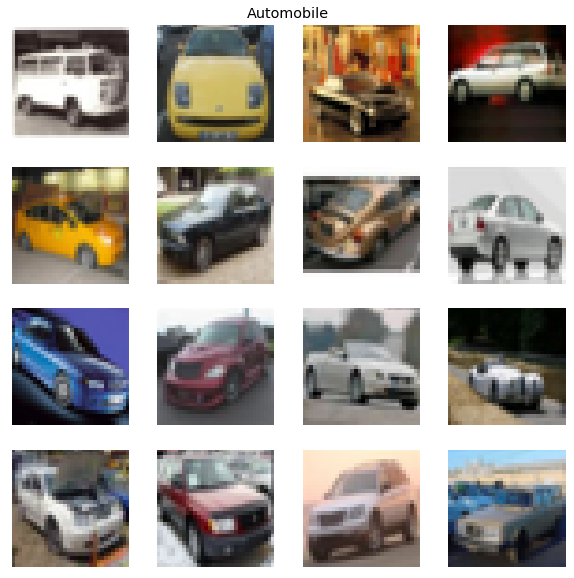

In [37]:
main()

You can check all the possible dunction here as well
Press 1 for data visualization
Press 2 for Testing the model
Press 3 for Results i.e validation loss , validation accuracy , confusion matrix and SOTA accuracy
Press 4 to check the accuracy
Enter the number here = 2


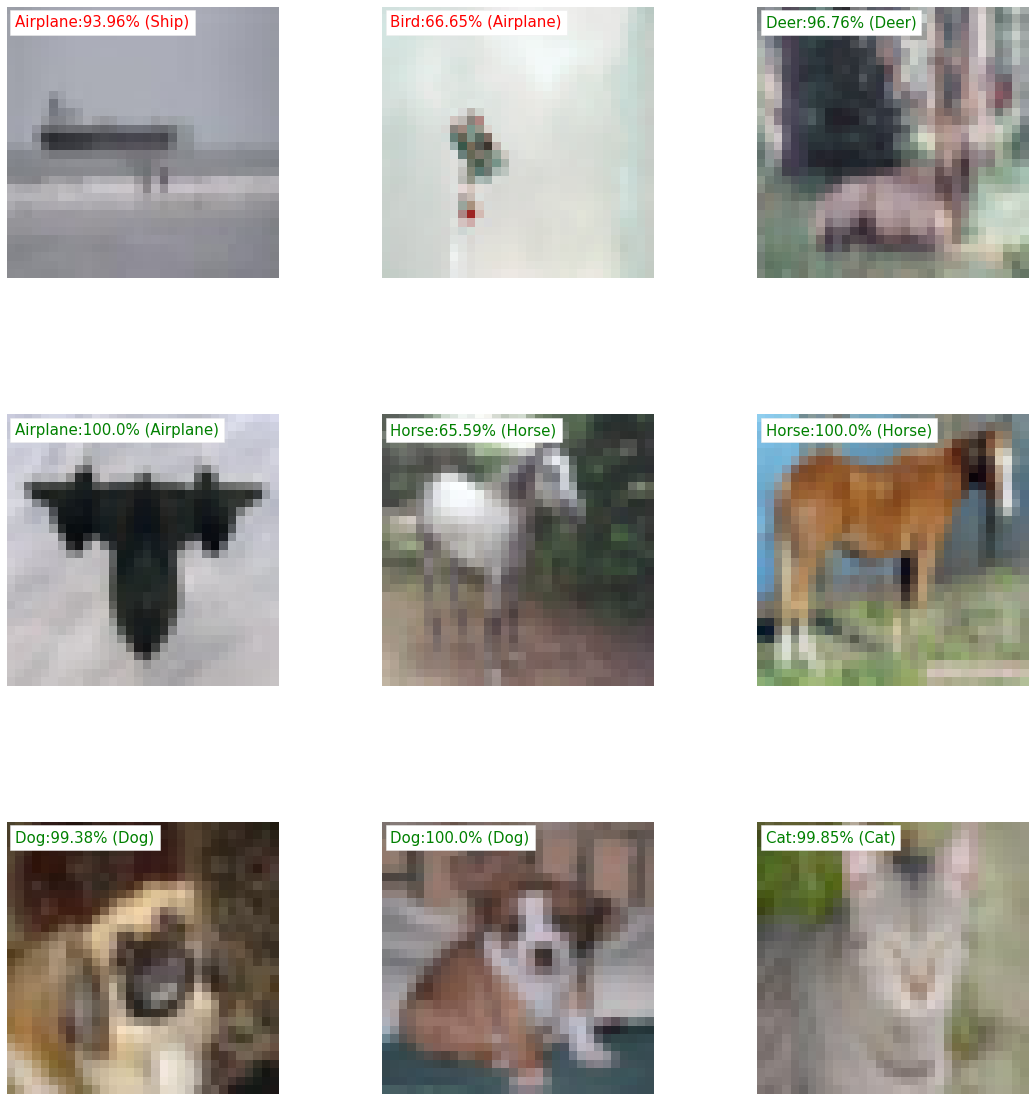

In [40]:
main()

You can check all the possible dunction here as well
Press 1 for data visualization
Press 2 for Testing the model
Press 3 for Results i.e validation loss , validation accuracy , confusion matrix and SOTA accuracy
Press 4 to check the accuracy
Enter the number here = 3
Press 1 for Model Accuracy
Press 2 for Model Loss
Press 3 for Confusion Matrix
Press 4 for SOTA Accuracy
Enter the number here = 1
dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


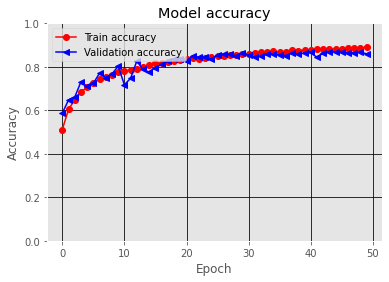

In [67]:
main()

You can check all the possible dunction here as well
Press 1 for data visualization
Press 2 for Testing the model
Press 3 for Results i.e validation loss , validation accuracy , confusion matrix and SOTA accuracy
Press 4 to check the accuracy
Enter the number here = 3
Press 1 for Model Accuracy
Press 2 for Model Loss
Press 3 for Confusion Matrix
Press 4 for SOTA Accuracy
Enter the number here = 2


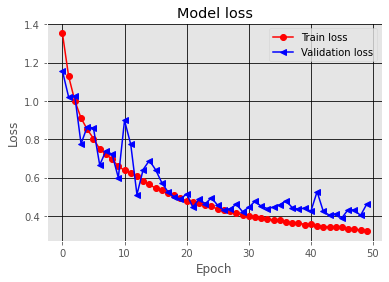

In [66]:
main()

You can check all the possible dunction here as well
Press 1 for data visualization
Press 2 for Testing the model
Press 3 for Results i.e validation loss , validation accuracy , confusion matrix and SOTA accuracy
Press 4 to check the accuracy
Enter the number here = 3
Press 1 for Model Accuracy
Press 2 for Model Loss
Press 3 for Confusion Matrix
Press 4 for SOTA Accuracy
Enter the number here = 3


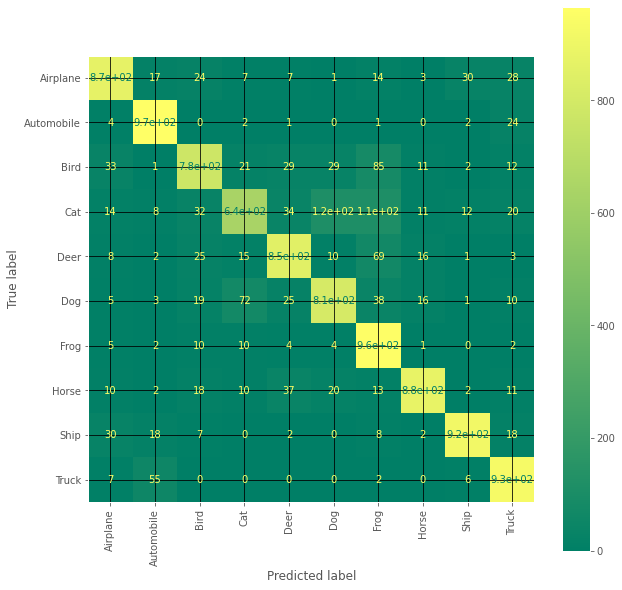

In [68]:
main()

You can check all the possible dunction here as well
Press 1 for data visualization
Press 2 for Testing the model
Press 3 for Results i.e validation loss , validation accuracy , confusion matrix and SOTA accuracy
Press 4 to check the accuracy
Enter the number here = 3
Press 1 for Model Accuracy
Press 2 for Model Loss
Press 3 for Confusion Matrix
Press 4 for SOTA Accuracy
Enter the number here = 4
1   MCDNN
2   GPEI
3   Maxout Network (K = 2)
4   Network in Network
5   DSN
6   SSCNN
7   Fractional MP
8   DenseNet
9   Deep pyramidal residual network
10   SENet + ShakeShake + Cutout
11   SENet + ShakeShake + Cutout
10000/10000 [==============================] - 1s 134us/step


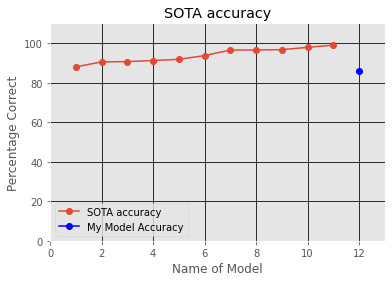

In [42]:
main()

In [43]:
main()

You can check all the possible dunction here as well
Press 1 for data visualization
Press 2 for Testing the model
Press 3 for Results i.e validation loss , validation accuracy , confusion matrix and SOTA accuracy
Press 4 to check the accuracy
Enter the number here = 4
Accuracy is = 85.97%
